In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import lin_Fit as lf
import pandas as pd
from lib5 import quad, getV
from scipy.stats import chi2
import scipy.integrate as integrate

# Estrarre $a_i$

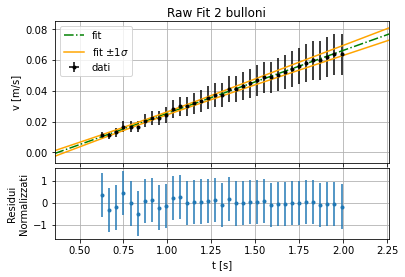

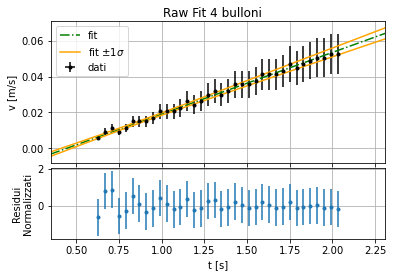

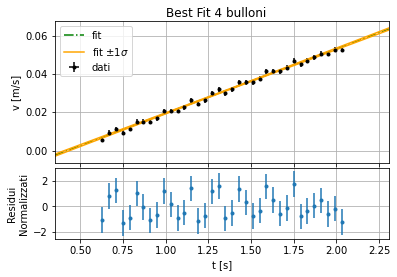

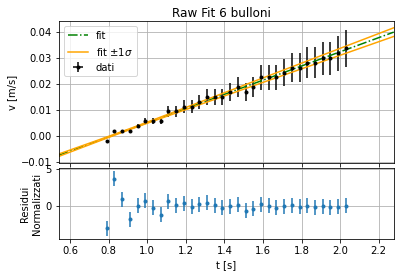

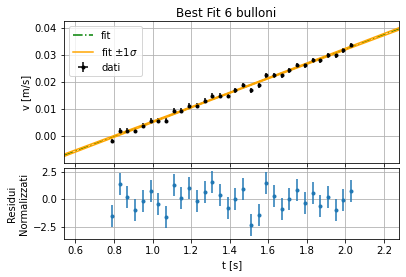

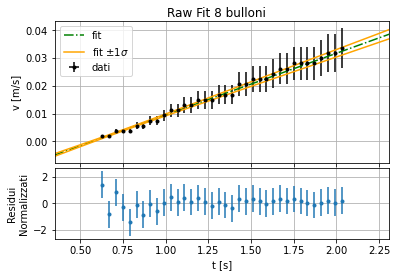

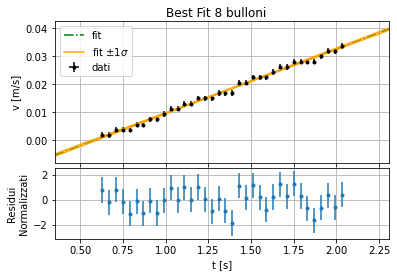

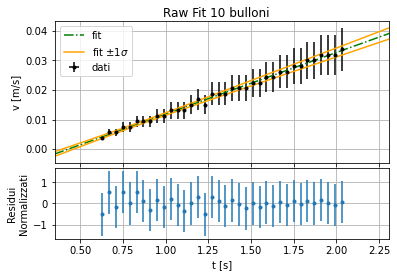

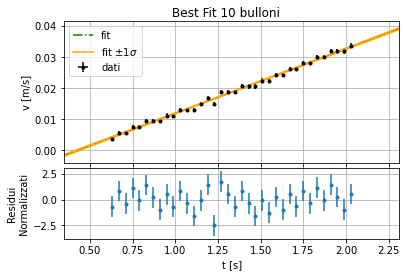

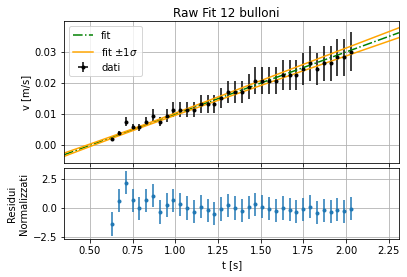

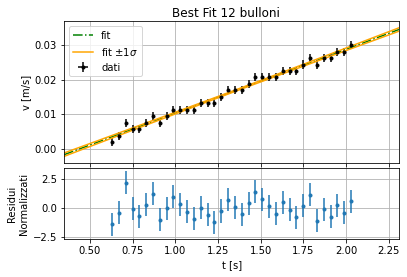

In [3]:
#setup grafici
fig1 = plt.figure(1)
fig2 = plt.figure(2)
ls = ['-','--','-.',':','-','--']

#setup analisi
limits = np.array([[30,30,38,30,30,30], #minimi
                   [100,102,102,102,102,102]]) #massimi
a = np.arange(6.0)
chi2_raw = np.arange(6.0)
chi2_best = np.arange(6.0)
sigma_a = np.arange(6.0)
sigma_x = 0.3*(10**-7)
sigma_t = 0.3*(10**-2)

#ciclo for
for i in range(6):
    name = 'data/completa'+str(i)+'.txt'
    df = pd.read_csv(name, sep = '\t', skiprows=1)
    t = df['Time (s)'].to_numpy()
    x = df['Position (m)'].to_numpy()
    x = x[limits[0][i]:limits[1][i]]
    t = t[limits[0][i]:limits[1][i]]
    
    n = x.size/2 # numero di punti sperimentali per il fit, n è float
    v = np.arange(n)
    sigma_v = np.arange(n)
    tau = np.arange(n)
    sigma_tau = np.arange(n)
    for j in range(int(n)):
        v[j], sigma_v[j] = getV(x[2*j+1],x[2*j],t[2*j+1],t[2*j], sigma_x, sigma_x, sigma_t, sigma_t) 
        tau[j] = (t[2*j+1]+t[2*j])/2
        sigma_tau[j] = quad(sigma_t, sigma_t)*0.5    
        
    m0 = (v[int(n-1)]-v[0])/(tau[int(n-1)]-tau[0])
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v, sigma_tau, m0, plot=True, verbose=False, res = True, save = True,
                                                        title='Raw Fit '+str((i+1)*2)+' bulloni', xlabel='t [s]', ylabel='v [m/s]', name='fig5b/rawFit'+str(i)+'.pdf', )
    chi2_raw[i] = np.sum(((v-(a[i]*tau+c))/sigma_v)**2)
    
    sigma_v_new_scalar = np.sqrt(np.sum((v-(a[i]*tau+c))**2)/(n-2))
    sigma_v_new = np.full(int(n), sigma_v_new_scalar)
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v_new, plot=True, verbose = False, save = True, res=True,
                                                        title='Best Fit '+str((i+1)*2)+' bulloni', xlabel = 't [s]', ylabel='v [m/s]', name='fig5b/bestFit'+str(i)+'.pdf')
    chi2_best[i] = np.sum(((v-(a[i]*tau+c))/sigma_v_new)**2)
    
    
    # Plottare posizioni e velocità
    plt.figure(fig1.number)
    plt.plot(t,x, label = str((i+1)*2)+' bulloni', ls = ls[i])
    plt.legend()
    plt.grid()
    
    
    plt.figure(2)
    plt.plot(tau,v, label = str((i+1)*2)+' bulloni', ls =ls[i])
    plt.legend()
    plt.grid() 
    
plt.figure(1)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.title('Posizioni misurate')

plt.figure(2)
plt.xlabel('t [s]')
plt.ylabel('v [m]')
plt.title('Velocità calcolate')


fig1.savefig('fig5b/posizioni.pdf')
fig2.savefig('fig5b/velocità.pdf')
plt.close(1)
plt.close(2)

In [4]:
matrix1 = np.matrix([a, sigma_a, chi2_raw, chi2_best]) 
result1 = pd.DataFrame(data=matrix1, columns=[2,4,6,8,10,12], index=['a [m/s^2]','$\sigma_a$ [m/s^2]', '$\chi^2$ raw', '$\chi^2$ best'])
result1

2          4          6          8          10  \
a [m/s^2]            0.040270   0.033639   0.027012   0.023027   0.020819   
$\sigma_a$ [m/s^2]   0.000381   0.000508   0.000439   0.000382   0.000277   
$\chi^2$ raw         1.025878   3.579777  30.178335   7.908536   2.177498   
$\chi^2$ best       30.985667  31.716171  29.369463  23.576189  33.800986   

                           12  
a [m/s^2]            0.018454  
$\sigma_a$ [m/s^2]   0.000464  
$\chi^2$ raw        11.132509  
$\chi^2$ best       22.575131

Text(0.5, 0.98, 'Risultati del fit')

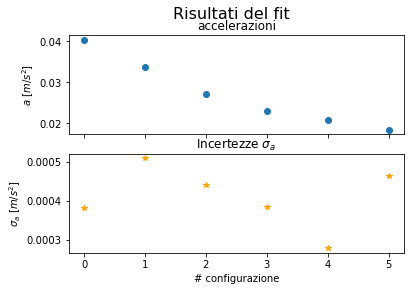

In [5]:
fig3, ax3 = plt.subplots(2, sharex = True)
ax3[0].plot(a, 'o')
ax3[0].set_title('accelerazioni')
ax3[0].set_ylabel('$a~[m/s^2]$')
ax3[1].plot(sigma_a, '*', color = 'orange')
ax3[1].set_title('Incertezze $\sigma_a$',)
ax3[1].set_ylabel('$\sigma_a~[m/s^2]$')
plt.xlabel('# configurazione')
fig3.suptitle('Risultati del fit', fontsize=16)

# Fit $\frac{1}{a}=A+Bn$
Consideriamo la propagazione delle incertezze per la funzione $y=1/a$, 

otteniamo: $\sigma_y=|\frac{\sigma_a}{a^2}|$

m         =  2.9728
sigma(m)  =  0.0869
c         =  18.7281
sigma(c)  =  0.6767
cov(m, c) =  -0.0528
rho(m, c) =  -0.8987
P-value Raw Fit: 13.54%
P-value Best Fit: 41.11%
chi2 Raw Fit: 7.01
chi2 Best Fit: 3.96


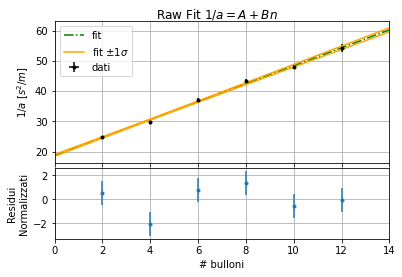

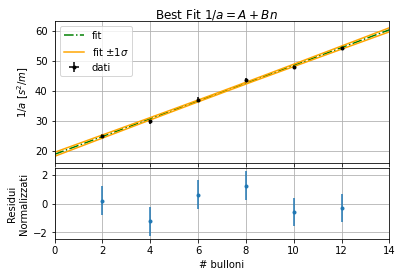

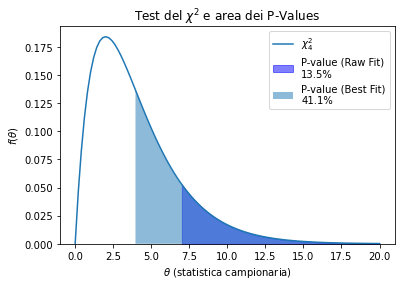

In [6]:
# Raw Fit (chiamo i risultati di questo fit con m1,sigma_m1,c1...)
n = np.array([2,4,6,8,10,12])
y = 1/a
sigma_y = abs(sigma_a/a**2)
m1, sigma_m1, c1, sigma_c1, cov1, rho1 = lf.lin_fit(n,y,sigma_y, res=True,verbose=False, xlabel='# bulloni', ylabel='$1/a~[s^2/m]$', title='Raw Fit $1/a=A+Bn$')


# Test del chi2
nu = 4
chi2_raw = np.sum(((y-m1*n-c1)/sigma_y)**2)
Pv_raw, trash = integrate.quad(chi2.pdf, chi2_raw, np.inf,args=[nu]) #trash è l'incertezza dovuta all'integrazione

#Poiché il P-Value è basso si decide di stimare a posteriori

# Stima posteriori
sigma_y_new_scalar = np.sqrt(np.sum((y-(m1*n+c1))**2)/4)
sigma_y_new = np.full(6, sigma_y_new_scalar)

# Best Fit (chiamo i risultati di questo fit con m2, sigma_m2, c2 ...)
m2, sigma_m2, c2, sigma_c2, cov2, rho2 = lf.lin_fit(n,y,sigma_y_new, res=True,verbose=True, xlabel='# bulloni', ylabel='$1/a~[s^2/m]$', title='Best Fit $1/a=A+Bn$')
chi2_best = np.sum(((y-m2*n-c2)/sigma_y_new)**2)
Pv_best, trash = integrate.quad(chi2.pdf, chi2_best, np.inf,args=[nu])


# Grafico chi2
plt.figure()
x = np.linspace(0,20,100)
plt.plot(x, chi2.pdf(x,df=nu), label = '$ \chi^2_4$')
plt.ylim(0)
plt.title('Test del $\chi^2$ e area dei P-Values')
x_color_raw = np.linspace(chi2_raw, 20, 100)
x_color_best = np.linspace(chi2_best, 20, 100)
plt.fill_between(x_color_raw, 0, chi2.pdf(x_color_raw, nu), label='P-value (Raw Fit)\n'+"{:.1%}".format(Pv_raw), alpha = 0.5, color = 'blue')
plt.fill_between(x_color_best, 0, chi2.pdf(x_color_best, nu), label='P-value (Best Fit)\n'+"{:.1%}".format(Pv_best), alpha = 0.5)
plt.xlabel('$\\theta$ (statistica campionaria)')
plt.ylabel('$f(\\theta)$')
plt.legend()
plt.savefig('fig5b/chi2.pdf')

# stampe
print("P-value Raw Fit: {:.2%}".format(Pv_raw))
print("P-value Best Fit: {:.2%}".format(Pv_best))
print("chi2 Raw Fit: {:.2f}".format(chi2_raw))
print("chi2 Best Fit: {:.2f}".format(chi2_best))
#non ho idea di quante cifre significative ci vadano per questi chi2

# Estrapolazione $I_0$ e $M_a$
- Massa singolo bullone
    - Dal momento che non siamo in condzioni di ripetibilità (ogni massa di ogni bullone è diversa), non possiamo usare la deviazione standard campionaria come incertezza sulla singola misura
    - Usiamo allora come incertezza sulla singola misura soltanto $\sigma_b = ris/\sqrt{12}$
    - Poiché l'incertezza sulla media va come $\sigma=\frac{\sigma}{\sqrt{N}}$, poiché $N = 12$, stiamiamo l'incertezza sulla massa media del bullone come $ris/12$
   

In [30]:
# Misura massa singolo bullone
df1 = pd.read_csv('csv/data - 2.csv')
masse = df1['m(b)'].to_numpy()
conf = np.array([1,4,7,8,9,10,13,14,15,16,18,19])
mtot = 0
for i in range(12):
    mtot += masse[conf[i]-1]
m_b = mtot/12
sigma_m_b = 0.1/np.sqrt(12) 
#Dal momento che la massa di ogni bullone è diversa, non siamo in condizion di ripetibilità

0.02886751345948129

# Propagazione delle incertezze

In [ ]:
import sympy as sp
v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2 = sp.symbols('v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2')
v = (x2-x1)/(t2-t1)
sigma_v = quad(sp.diff(v,x2)*sigma_x2,
               sp.diff(v,x1)*sigma_x1,
               sp.diff(v,t2)*sigma_t2,
               sp.diff(v,t1)*sigma_t1)
sigma_v